In [125]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [126]:
import pandas as pd

In [127]:
uav = np.genfromtxt('/media/adam/data/is6_f11/guy_auv/is6_50cm_auv_draft_sipexgrid.txt')

In [128]:
uav[0]

array([ 179.71 ,  -57.282,      nan,      nan])

In [129]:
uav[1:10,1]

array([-56.783, -56.283, -55.784, -55.284, -54.785, -54.285, -53.786,
       -53.286, -52.787])

In [130]:
print('min X: {} max X: {}'.format(np.min(uav[:,0]), np.max(uav[:,0])))

min X: -168.48 max X: 194.32


In [131]:
print('min Y: {} max Y: {}'.format(np.min(uav[:,1]), np.max(uav[:,1])))

min Y: -57.282 max Y: 299.3


In [132]:
uav = uav[:,0:3]

In [133]:
uav.shape

(478130, 3)

In [134]:
uav_subset = uav[(uav[:,0] >= -150) & (uav[:,0] <= 130) & (uav[:,1] >= -30) & (uav[:,1] <= 275) ]

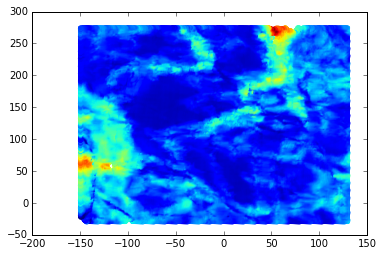

In [135]:
plt.scatter(uav_subset[:,0], uav_subset[:,1], c=uav_subset[:,2], lw=0)

In [136]:
lidar = np.genfromtxt('/media/adam/data/is6_f11/python_zi/is6_f11_pass1_aa_nr2_522816_523019_c_zi.xyz')

In [137]:
lidar_subset = lidar[(lidar[:,1] >= -150) & (lidar[:,1] <= 130) & (lidar[:,2] >= -30) & (lidar[:,2] <= 275) ]

In [160]:
from icefunctions import compute_zs, compute_zi
d_snow = 305.67 #mean of all EA obs
sd_dsnow = 10
d_ice = 928.8 #empirically derived from matching with AUV draft
sd_dice = 10
d_water = 1028 #Hutchings2015
sd_dwater = 1

#sipex2 snow model
s_i = ([0.64, +0.076])

zs_l, zs_l_u = compute_zs(lidar_subset[:,3], s_i, lidar_subset[:,4])
zi, zi_uncert = compute_zi(lidar_subset[:,3], zs_l, d_ice, d_water, d_snow, lidar_subset[:,4], \
                           zs_l_u, sd_dsnow, sd_dice, sd_dwater)
draft_li = np.abs(lidar_subset[:,3]-(zs_l+zi))

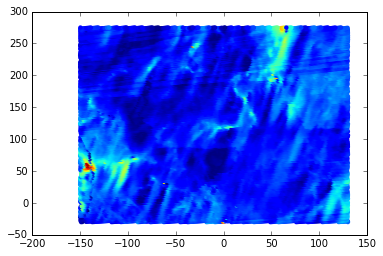

In [161]:
plt.scatter(lidar_subset[:,1], lidar_subset[:,2], c=draft_li, lw=0)

In [141]:
from scipy.interpolate import griddata

In [142]:
np.floor(np.min(lidar_subset[:,0]))

522939.0

In [143]:
np.ceil(np.max(lidar_subset[:,0]))

522946.0

In [144]:
grid_x = np.arange(np.floor(min(lidar_subset[:,1])),np.ceil(max(lidar_subset[:,1])), 1)
grid_y = np.arange(np.floor(min(lidar_subset[:,2])),np.ceil(max(lidar_subset[:,2])), 1)

#grid_x = np.arange(0,np.ceil(max(lidar_subset[:,0]))-np.floor(min(lidar_subset[:,0])), 0.5)
#grid_y = np.arange(0,np.ceil(max(lidar_subset[:,1]))-np.floor(min(lidar_subset[:,1])), 0.5)



xx, yy = np.meshgrid(grid_x, grid_y)

In [162]:
from matplotlib.mlab import griddata as gd

g_lidar = gd(lidar_subset[:,1], lidar_subset[:,2], draft_li, grid_x,grid_y, interp='linear')


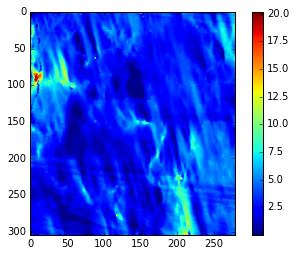

In [163]:
plt.imshow(g_lidar)
plt.colorbar()

In [164]:
uav_subset = uav_subset[~np.isnan(uav_subset).any(1)]

In [165]:
g_auv = griddata(uav_subset[:,0:2], uav_subset[:,2], (xx, yy), method='nearest')


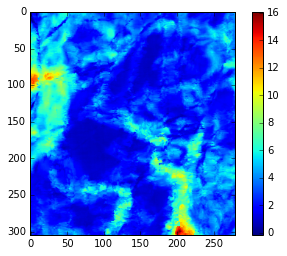

In [166]:
plt.imshow(g_auv)
plt.colorbar()

## OK, two gridded datasets on the same grid.

### difference map

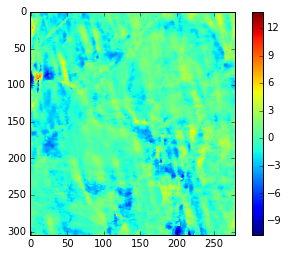

In [167]:
plt.imshow(g_lidar - g_auv)
plt.colorbar()

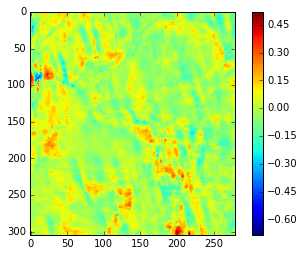

In [169]:
#lets normalise the data...
plt.imshow(g_auv/np.max(g_lidar) - g_lidar/np.max(g_lidar))
plt.colorbar()

In [227]:
np.mean(g2_lidar)

3.1391734902245736e-17

In [228]:
np.max(g2_lidar/np.max(g2_lidar))

1.0

In [229]:
np.max(g2_auv/np.max(g2_auv))

1.0

In [72]:
smooth_20m = np.genfromtxt('/media/adam/data/is6_f11/python_zi/is6_f11_pass1_aa522816_523019_cnstats.xyz')

In [73]:
min(smooth_20m[:,5])

nan

(array([  7.07100000e+04,   4.24063000e+05,   4.62263000e+05,
          3.22563000e+05,   2.07857000e+05,   1.35530000e+05,
          9.13480000e+04,   6.35880000e+04,   4.57170000e+04,
          3.33980000e+04,   2.48890000e+04,   1.85140000e+04,
          1.39640000e+04,   1.05690000e+04,   7.98200000e+03,
          5.79800000e+03,   4.43000000e+03,   3.22400000e+03,
          2.39300000e+03,   1.70300000e+03,   1.26500000e+03,
          8.87000000e+02,   6.81000000e+02,   4.28000000e+02,
          3.24000000e+02,   2.44000000e+02,   1.52000000e+02,
          1.15000000e+02,   7.30000000e+01,   4.10000000e+01,
          2.50000000e+01,   2.40000000e+01,   1.50000000e+01,
          9.00000000e+00,   9.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([ 0.        ,  0.02742525,  0.0548505 ,  0.08227575,  0.109701  ,
         0.13712625,  0.1645515 ,  0.19197675,  0.219402  ,  0.24682725,
         0.2742525 ,

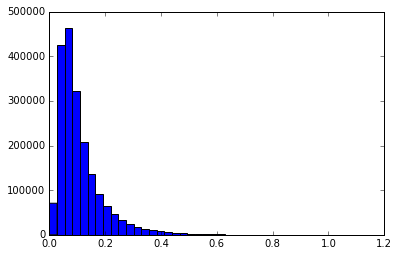

In [74]:
this = np.isnan(smooth_20m[:,5])
smooth_20m[this,5] = 0

plt.hist(smooth_20m[:,5], bins=40)

In [ ]:
from sklearn import neighbors as nb

def build_tree(pointcloud, leafsize):
    return nb.KDTree(pointcloud, leaf_size=leafsize)

def n_filter(pointcloud, tree, radius):
    '''
    takes in a point cloud (xyzi), a kDtree (generated in spatialmedian),
    and a neighbourhood.
    returns the standard deviation of points within (radius) metres
    of each point as a new point list.
    '''
    nhoods = tree.query_radius(pointcloud[:,0:3], r=radius)
    n_stats = []
    i = 0
    for nhood in nhoods:
        #print(nhood)
        n_stats.append([np.mean(pointcloud[nhood[:],2]),\
                      np.median(pointcloud[nhood[:],2]),\
                      np.std(pointcloud[nhood[:],2])])
        #print(pointcloud[i,:])
        #print(new_z[i])
        i += 1
    return n_stats


points_kdtree = build_tree(xyzi_[:,0:3], 60)

startTime = datetime.now()
nhood_stats = np.array(n_filter(xyzi_, points_kdtree, 2))
print('time to generate n stats: {}'.format(datetime.now() - startTime))